In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

path = os.getcwd()
df_test = pd.read_csv(path + '/test.csv')
df_train = pd.read_csv(path + '/train.csv')


df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


<h1> Data Overview </h1>

In [2]:
#dimension
print('Dimension of Test Data ', df_test.shape)
print('Dimension of Train Data', df_train.shape)

Dimension of Test Data  (367, 12)
Dimension of Train Data (614, 13)


In [3]:
#data type
df_train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [4]:
#missing value
def missing_data():
    df_train_missing = pd.DataFrame(df_train.isna().sum())
    df_train_missing.reset_index(level = 0, inplace = True)
    df_train_missing.columns = ['Column Name', 'Total Missing Values']
    df_train_missing = df_train_missing.sort_values(by = 'Total Missing Values', ascending = False)
    return df_train_missing

missing_data()

,Column Name,Total Missing Values
10,Credit_History,50
5,Self_Employed,32
8,LoanAmount,22
3,Dependents,15
9,Loan_Amount_Term,14
1,Gender,13
2,Married,3
0,Loan_ID,0
4,Education,0
6,ApplicantIncome,0


In [5]:
def missing_data():
    df_train_missing = pd.DataFrame(df_test.isna().sum())
    df_train_missing.reset_index(level = 0, inplace = True)
    df_train_missing.columns = ['Column Name', 'Total Missing Values']
    df_train_missing = df_train_missing.sort_values(by = 'Total Missing Values', ascending = False)
    return df_train_missing

missing_data()

,Column Name,Total Missing Values
10,Credit_History,29
5,Self_Employed,23
1,Gender,11
3,Dependents,10
9,Loan_Amount_Term,6
8,LoanAmount,5
0,Loan_ID,0
2,Married,0
4,Education,0
6,ApplicantIncome,0


In [6]:
#separate categorical and integer
df_train_cat = df_train.select_dtypes(include = ['object'])
df_train_numeric = df_train.select_dtypes(include = ['int64', 'float64']).dropna() #drop the no to show distribution graph

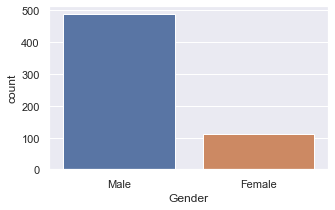

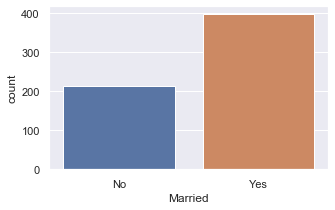

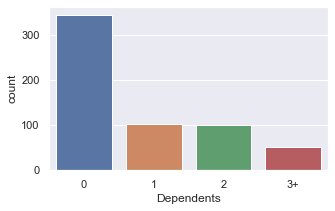

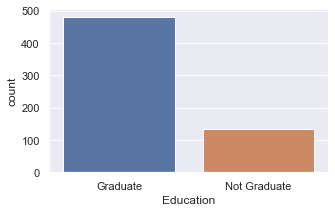

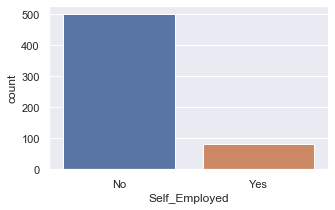

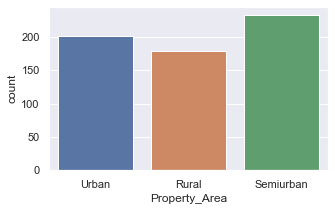

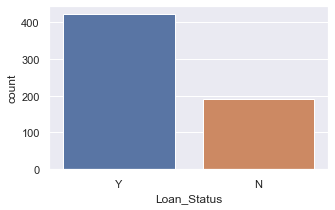

In [7]:
#categorical value
for column in df_train_cat.columns[1:]: 
    sns.set()
    fig, ax = plt.subplots()
    sns.countplot(x=column, data=df_train_cat) 
    fig.set_size_inches(5,3)

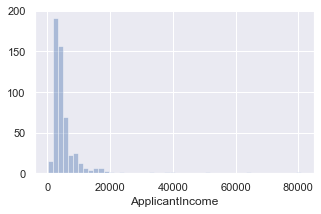

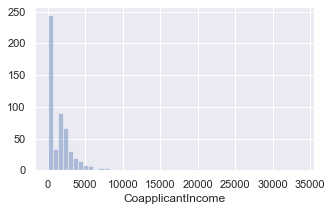

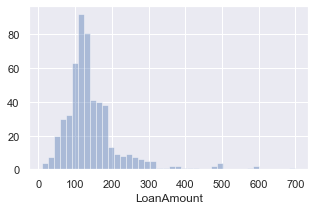

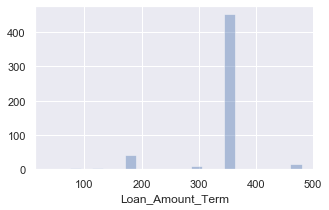

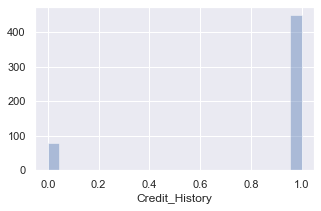

In [8]:
#numeric distribution

for column in df_train_numeric.columns:
    sns.set()
    fig, ax = plt.subplots()
    sns.distplot(df_train_numeric[column], kde = False)
    fig.set_size_inches(5, 3)

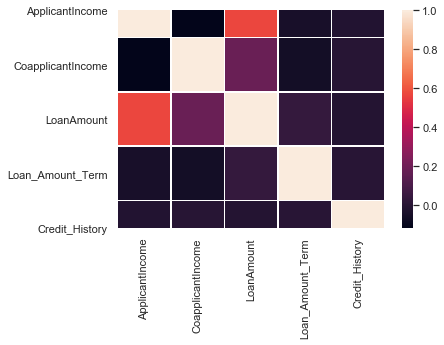

In [9]:
#correlation matrix
sns.heatmap(df_train.corr(), linewidths=.5)
fig.set_size_inches(15, 5)

<p> Key findings = Applicant Income and Co-applicant Income is highly correlated with the amount of loan borrowed </p> 
<b> Recommendation </b> <li> drop the Applicant and Co-applicant Income column and generate new ratio of loan and income to a new column </li> <li> Predict <i> Loan Amount </i> based on <i> Applicant and Co-applicant Income </i> with KNN </li> 
<li> drop other columns with na </li>
<li> encode all categorical data </li>
<li> upsample loan status 'zero' </li>

<h1> Feature Engineering </h1>

In [10]:
#predict loan amount
df_loan_predict = df_train[['ApplicantIncome', 'LoanAmount']]

df_loan_predict_test = df_loan_predict[df_loan_predict['LoanAmount'].isnull()].drop(['LoanAmount'], axis = 1)
df_loan_predict_train = df_loan_predict[df_loan_predict['LoanAmount'].notnull()]

In [11]:
df_loan_predict_train.head()

,ApplicantIncome,LoanAmount
1,4583,128.0
2,3000,66.0
3,2583,120.0
4,6000,141.0
5,5417,267.0


In [12]:
#create model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split


x = df_loan_predict_train.drop(['LoanAmount'], axis = 1)
y = df_loan_predict_train['LoanAmount']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state  =42)

knn = KNeighborsRegressor()
knn.fit(x_train, y_train)
pred_knn = knn.predict(x_test)

In [13]:
knn.score(x_test, pred_knn)

1.0

In [14]:
#fill missing value with KNN
prediction_data = knn.predict(df_loan_predict_test)
predicted_loan = pd.DataFrame({'LoanAmount': prediction_data})

df_loan_predict_test = df_loan_predict_test.reset_index(drop = True)
df_loan_predict_test['LoanAmount'] = predicted_loan

df_loan_predict_test

,ApplicantIncome,LoanAmount
0,5849,158.4
1,2275,106.6
2,4945,122.2
3,2395,104.8
4,6782,175.2
5,13650,256.6
6,4652,115.2
7,7451,170.2
8,3865,93.4
9,3992,169.6


In [15]:
#merge missing value to the df_train
df_train_test = df_train.copy()

In [16]:
#append table
df_train_test_null = df_train_test[df_loan_predict['LoanAmount'].isnull()].reset_index(drop = True)
df_train_test_notnull =  df_train_test[df_train_test['LoanAmount'].notnull()].reset_index(drop = True) #need to reset index so it can be appended
df_train_test_null = df_train_test_null.drop(['LoanAmount'], axis = 1)
df_train_test_null['LoanAmount'] = df_loan_predict_test['LoanAmount']
df_train_test_null
df_loan_clean = df_train_test_notnull.append(df_train_test_null)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [17]:
df_loan_clean.isna().sum()

ApplicantIncome       0
CoapplicantIncome     0
Credit_History       50
Dependents           15
Education             0
Gender               13
LoanAmount            0
Loan_Amount_Term     14
Loan_ID               0
Loan_Status           0
Married               3
Property_Area         0
Self_Employed        32
dtype: int64

In [18]:
#drop row with na
df_naan_clean = df_loan_clean.dropna()

In [19]:
#drop applicant and coapplicant income and generate loan to income column
df_naan_clean['LoanToIncome'] = df_naan_clean['LoanAmount']/df_naan_clean['ApplicantIncome'] * 100
df_test['LoanToIncome'] = df_test['LoanAmount']/df_test['ApplicantIncome'] * 100
df_clean = df_naan_clean.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'], axis = 1)
df_test = df_test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'], axis = 1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
df_naan_clean = df_naan_clean.drop(['Loan_ID'], axis = 1)
df_naan_clean.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_Status,Married,Property_Area,Self_Employed,LoanToIncome
0,4583,1508.0,1.0,1,Graduate,Male,128.0,360.0,N,Yes,Rural,No,2.792930
1,3000,0.0,1.0,0,Graduate,Male,66.0,360.0,Y,Yes,Urban,Yes,2.200000
2,2583,2358.0,1.0,0,Not Graduate,Male,120.0,360.0,Y,Yes,Urban,No,4.645761
3,6000,0.0,1.0,0,Graduate,Male,141.0,360.0,Y,No,Urban,No,2.350000
4,5417,4196.0,1.0,2,Graduate,Male,267.0,360.0,Y,Yes,Urban,Yes,4.928927


In [21]:
df_test.isna().sum()
df_test_naan = df_test.dropna()
df_test_naan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,LoanToIncome
0,LP001015,Male,Yes,0,Graduate,No,360.0,1.0,Urban,1.923077
1,LP001022,Male,Yes,1,Graduate,No,360.0,1.0,Urban,4.096229
2,LP001031,Male,Yes,2,Graduate,No,360.0,1.0,Urban,4.160000
4,LP001051,Male,No,0,Not Graduate,No,360.0,1.0,Urban,2.380952
5,LP001054,Male,Yes,0,Not Graduate,Yes,360.0,1.0,Urban,7.020785


In [22]:
#encode categorical data
df_naan_clean.select_dtypes(include = ['object']).head()

,Dependents,Education,Gender,Loan_Status,Married,Property_Area,Self_Employed
0,1,Graduate,Male,N,Yes,Rural,No
1,0,Graduate,Male,Y,Yes,Urban,Yes
2,0,Not Graduate,Male,Y,Yes,Urban,No
3,0,Graduate,Male,Y,No,Urban,No
4,2,Graduate,Male,Y,Yes,Urban,Yes


In [30]:
#encode categorical data
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

le = LabelEncoder()
he = OneHotEncoder()

#dependent
le.fit(df_naan_clean['Dependents'])
df_naan_clean['Dependents'] = le.transform(df_naan_clean['Dependents'])
df_test_naan['Dependents'] = le.transform(df_test_naan['Dependents'])

#Education
le.fit(df_naan_clean['Education'])
df_naan_clean['Education'] = le.transform(df_naan_clean['Education'])
df_test_naan['Education'] = le.transform(df_test_naan['Education'])

#Gender
le.fit(df_naan_clean['Gender'])
df_naan_clean['Gender'] = le.transform(df_naan_clean['Gender'])
df_test_naan['Gender'] = le.transform(df_test_naan['Gender'])

#Married
le.fit(df_naan_clean['Married'])
df_naan_clean['Married'] = le.transform(df_naan_clean['Married'])
df_test_naan['Married'] = le.transform(df_test_naan['Married'])

#Property_Area
le.fit(df_naan_clean['Property_Area'])
df_naan_clean['Property_Area'] = le.transform(df_naan_clean['Property_Area'])
df_test_naan['Property_Area'] = le.transform(df_test_naan['Property_Area'])

#Self_Employed
le.fit(df_naan_clean['Self_Employed'])
df_naan_clean['Self_Employed'] = le.transform(df_naan_clean['Self_Employed'])
df_test_naan['Self_Employed'] = le.transform(df_test_naan['Self_Employed'])

#Loan Status
le.fit(df_naan_clean['Loan_Status'])
df_naan_clean['Loan_Status'] = le.transform(df_naan_clean['Loan_Status'])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [42]:
df_naan_clean.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_Status,Married,Property_Area,Self_Employed,LoanToIncome
0,4583,1508.0,1.0,1,0,1,128.0,360.0,0,1,0,0,2.792930
1,3000,0.0,1.0,0,0,1,66.0,360.0,1,1,2,1,2.200000
2,2583,2358.0,1.0,0,1,1,120.0,360.0,1,1,2,0,4.645761
3,6000,0.0,1.0,0,0,1,141.0,360.0,1,0,2,0,2.350000
4,5417,4196.0,1.0,2,0,1,267.0,360.0,1,1,2,1,4.928927


In [29]:
df_test_naan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,LoanToIncome
0,LP001015,1,1,0,0,0,360.0,1.0,2,1.923077
1,LP001022,1,1,1,0,0,360.0,1.0,2,4.096229
2,LP001031,1,1,2,0,0,360.0,1.0,2,4.160000
4,LP001051,1,0,0,1,0,360.0,1.0,2,2.380952
5,LP001054,1,1,0,1,1,360.0,1.0,2,7.020785


In [59]:
#upsample
df_naan_clean.Loan_Status.value_counts()

1    341
0    158
Name: Loan_Status, dtype: int64

In [68]:
from sklearn.utils import resample

minority = df_naan_clean[df_naan_clean.Loan_Status == 0]
majority = df_naan_clean[df_naan_clean.Loan_Status == 1]

df_minority = resample(minority, replace = True, n_samples = 341, random_state = 303)

df_upsampled = pd.concat([majority, df_minority])

df_upsampled.Loan_Status.value_counts()

1    341
0    341
Name: Loan_Status, dtype: int64

In [78]:
#model building
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

x = df_upsampled.drop(['Loan_Status'], axis = 1)
y = df_upsampled['Loan_Status']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

#logreg
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
pred_logreg = logreg.predict(x_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [79]:
#svc
clf = svm.SVC()
clf.fit(x_train, y_train)
pred_clf = clf.predict(x_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [80]:
#random forest
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(x_train, y_train)
pred_rfc = rfc.predict(x_test)

In [81]:
#neural networks
mlpc = MLPClassifier(hidden_layer_sizes = (6, 6, 6), max_iter = 500)
mlpc.fit(x_train, y_train)
pred_mlpc = mlpc.predict(x_test)

In [82]:
#Perceptorn
prec = Perceptron()
prec.fit(x_train, y_train)
pred_prec = prec.predict(x_test)

In [83]:
#SGDClassifier
sgdc = SGDClassifier()
sgdc.fit(x_train, y_train)
pred_sgdc = sgdc.predict(x_test)

In [84]:
#KNN
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
pred_knn = knn.predict(x_test)

In [85]:
#Naive Bayes
gauss = GaussianNB()
gauss.fit(x_train, y_train)
pred_gauss = gauss.predict(x_test)

In [86]:
#Decision tree
dstree = DecisionTreeClassifier()
dstree.fit(x_train, y_train)
pred_dstree = dstree.predict(x_test)

In [87]:
#model evaluation

#accuracy score
rfc_score = accuracy_score(y_test, pred_rfc)
mlpc_score = accuracy_score(y_test, pred_mlpc)
logreg_score = accuracy_score(y_test, pred_logreg)
prec_score = accuracy_score(y_test, pred_prec)
sgdc_score = accuracy_score(y_test, pred_sgdc)
knn_score = accuracy_score(y_test, pred_knn)
gauss_score = accuracy_score(y_test, pred_gauss)
dstree_score = accuracy_score(y_test, pred_dstree)

modelResult = pd.DataFrame({
    'Model': ['Random Forest', 'Neural Networks', 'Logistic Regression', 
             'Preceptorn', 'SGDC', 'KNN', 'Naive Bayes', 'Decisiton Tree'],
    'Score': [rfc_score, mlpc_score, logreg_score, prec_score, sgdc_score, knn_score, gauss_score, dstree_score]
    
})

modelResult.sort_values(by = 'Score', ascending = False)

,Model,Score
0,Random Forest,0.897561
7,Decisiton Tree,0.858537
6,Naive Bayes,0.780488
2,Logistic Regression,0.751220
5,KNN,0.658537
1,Neural Networks,0.458537
4,SGDC,0.434146
3,Preceptorn,0.429268


<p> <b> <i> Random Forest </i> and <i> Decision Tree </i> appear to be top models </b> </p>

In [93]:
#confusion matrix 
from sklearn.metrics import confusion_matrix

print("Random Forest {}".format(confusion_matrix(y_test, pred_rfc, labels = [1, 0])))

print("Decision Tree {}".format(confusion_matrix(y_test, pred_dstree, labels = [1, 0])))

Random Forest [[100  16]
 [  5  84]]
Decision Tree [[89 27]
 [ 2 87]]


<h3> Hyperparameter Tuning </h3>

In [98]:
#hyperparameter tuning

print("Random Forest Parameter \n")
print(rfc.get_params())

Random Forest Parameter 

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
